In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

In [3]:
df_DA_US = df_DA_US.explode("job_skills")

In [4]:
df_DA_US['job_posted_month'] = df_DA_US['job_posted_date'].dt.month_name()

In [42]:
df_pivot = df_plot.pivot_table(index='job_posted_month', columns='job_skills', values='counts', fill_value=0)
df_pivot

job_skills,airflow,airtable,alteryx,angular,ansible,apl,arch,asana,asp.net,asp.net core,...,watson,webex,windows,wire,word,workfront,wrike,xamarin,yarn,zoom
job_posted_month,,,,,,,,,,,,,,,,,,,,,
April,28.0,1.0,208.0,8.0,3.0,7.0,3.0,5.0,6.0,0.0,...,2.0,4.0,86.0,9.0,695.0,8.0,1.0,0.0,0.0,12.0
August,44.0,2.0,187.0,5.0,3.0,10.0,0.0,5.0,3.0,0.0,...,3.0,6.0,87.0,4.0,752.0,0.0,0.0,0.0,0.0,26.0
December,20.0,2.0,115.0,10.0,5.0,0.0,3.0,7.0,3.0,0.0,...,4.0,6.0,47.0,4.0,451.0,3.0,4.0,0.0,0.0,21.0
February,35.0,0.0,203.0,23.0,4.0,1.0,0.0,14.0,9.0,0.0,...,6.0,6.0,92.0,3.0,738.0,3.0,0.0,0.0,0.0,19.0
January,39.0,7.0,206.0,21.0,7.0,1.0,0.0,15.0,17.0,0.0,...,7.0,9.0,80.0,3.0,968.0,0.0,7.0,0.0,0.0,30.0
July,42.0,2.0,160.0,5.0,3.0,5.0,5.0,6.0,2.0,0.0,...,4.0,1.0,59.0,10.0,587.0,0.0,0.0,0.0,1.0,13.0
June,39.0,5.0,188.0,9.0,4.0,8.0,3.0,7.0,7.0,0.0,...,5.0,2.0,69.0,8.0,721.0,5.0,0.0,0.0,0.0,20.0
March,39.0,1.0,219.0,5.0,5.0,6.0,1.0,14.0,11.0,0.0,...,7.0,6.0,76.0,5.0,736.0,1.0,1.0,1.0,0.0,16.0
May,27.0,3.0,144.0,15.0,8.0,9.0,1.0,5.0,13.0,0.0,...,1.0,6.0,67.0,1.0,557.0,3.0,0.0,0.0,0.0,9.0


In [43]:
import calendar
months = list(calendar.month_name)[1:]
months_present = [m for m in months if m in df_pivot.index]
df_pivot = df_pivot.loc[months_present]

In [44]:
df_skills = df_plot['job_skills'].value_counts().sort_values(ascending=False).head(5).index.tolist()

In [45]:
df_pivot = df_pivot[df_skills]

In [46]:
df_pivot

job_skills,sql,tableau,sas,power bi,r
job_posted_month,,,,,
January,4601.0,2488.0,1832.0,1337.0,1513.0
February,3168.0,1676.0,1212.0,1122.0,1045.0
March,3226.0,1804.0,1238.0,1054.0,1141.0
April,3220.0,1789.0,1302.0,1057.0,1038.0
May,2581.0,1432.0,972.0,860.0,867.0
June,2862.0,1628.0,984.0,989.0,1017.0
July,2609.0,1533.0,996.0,881.0,881.0
August,3414.0,1951.0,1276.0,1208.0,1271.0
September,2295.0,1353.0,856.0,820.0,746.0


<Axes: xlabel='job_posted_month'>

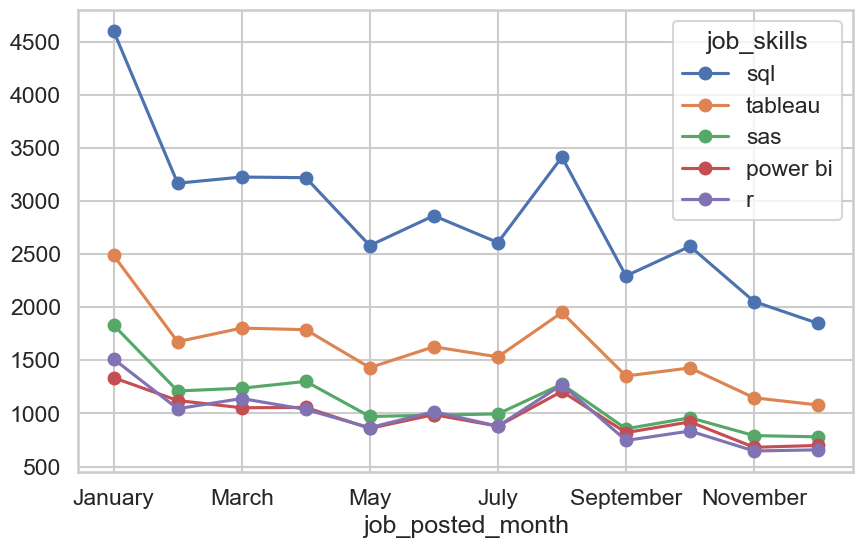

In [54]:
df_pivot.plot(kind='line', marker='o', figsize=(10, 6))

In [55]:
jobs_per_month = df_DA_US.groupby('job_posted_month').size().reindex(months_present, fill_value=0)
jobs_per_month = jobs_per_month.to_frame(name='job_counts')

In [56]:
preperc = df_pivot.merge(jobs_per_month, left_index=True, right_index=True)
preperc

,sql,tableau,sas,power bi,r,job_counts
job_posted_month,,,,,,
January,4601.0,2488.0,1832.0,1337.0,1513.0,32489
February,3168.0,1676.0,1212.0,1122.0,1045.0,23196
March,3226.0,1804.0,1238.0,1054.0,1141.0,23271
April,3220.0,1789.0,1302.0,1057.0,1038.0,23311
May,2581.0,1432.0,972.0,860.0,867.0,18803
June,2862.0,1628.0,984.0,989.0,1017.0,21418
July,2609.0,1533.0,996.0,881.0,881.0,19664
August,3414.0,1951.0,1276.0,1208.0,1271.0,25621
September,2295.0,1353.0,856.0,820.0,746.0,17489


In [63]:
preperc = df_pivot.div(jobs_per_month['job_counts'], axis=0) * 100



In [66]:
preperc

job_skills,sql,tableau,sas,power bi,r
job_posted_month,,,,,
January,14.161716,7.657977,5.638832,4.115239,4.656961
February,13.657527,7.225384,5.225039,4.837041,4.505087
March,13.862748,7.752138,5.319926,4.529242,4.903098
April,13.813221,7.674488,5.585346,4.534340,4.452833
May,13.726533,7.615806,5.169388,4.573738,4.610966
June,13.362592,7.601083,4.594267,4.617611,4.748343
July,13.267901,7.795972,5.065094,4.480269,4.480269
August,13.325007,7.614847,4.980290,4.714882,4.960774
September,13.122534,7.736291,4.894505,4.688661,4.265538


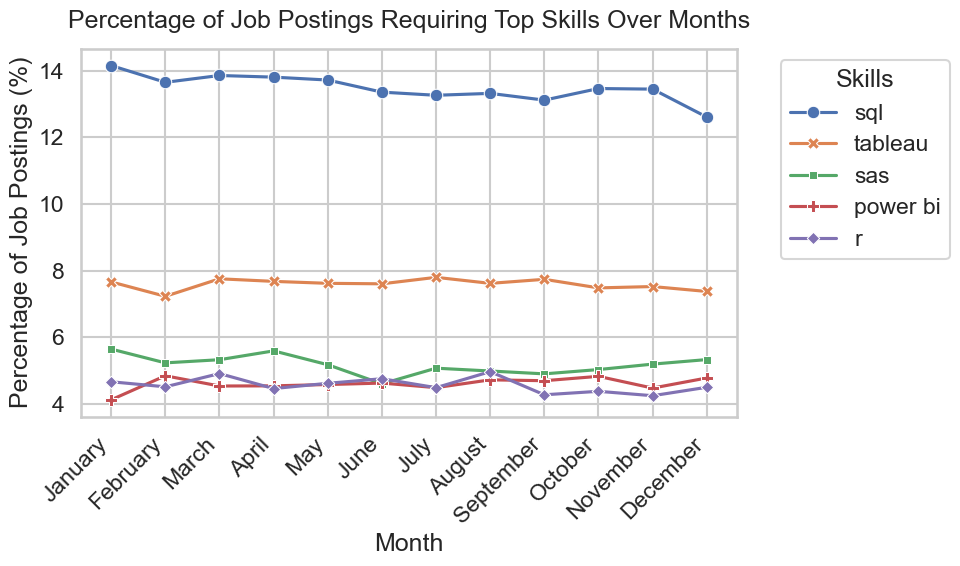

In [67]:
sns.set_theme(style="whitegrid", context="talk")

plt.figure(figsize=(10, 6))

sns.lineplot(
    data=preperc[skill_cols],
    markers=True,
    dashes=False
)

plt.title('Percentage of Job Postings Requiring Top Skills Over Months', pad=15)
plt.xlabel('Month')
plt.ylabel('Percentage of Job Postings (%)')
plt.legend(title='Skills', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()